In [1]:
import numpy as np
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
plt.rc('axes', labelsize=6)
#axes.linewidth : 0.5
plt.rc('axes', linewidth=0.5)
#ytick.major.width : 0.5
plt.rc('ytick.major', width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rc('ytick.minor', visible=True)

#plt.style.use(r"..\..\styles\infocom.mplstyle") # Insert your save location here

# width as measured in inkscape
fig_width = 3.487
#height = width / 1.618 / 2
fig_height = fig_width / 1.3 / 2

In [2]:
#cc_folder_list = ["SF_new_results/", "capacity_results/", "BF_new_results/"]
nc_folder_list = ["SF_new_results_NC/", "capacity_resultsNC/", "BF_new_results_NC/"]
#cc_folder_list = ["failure20stages-new-rounding/" + e  for e in cc_folder_list]
nc_folder_list = ["num-reconfig/" + e for e in nc_folder_list]
file_list = ["LimitedReconfig120.csv", "Any-reconfig120.csv"]
#print(cc_folder_list)
print(nc_folder_list)

['num-reconfig/SF_new_results_NC/', 'num-reconfig/capacity_resultsNC/', 'num-reconfig/BF_new_results_NC/']


In [3]:
nc_node_data = np.full((3, 3), 0)
max_stage = 20
selected_stage = 20
for i in range(3):
    for j in range(2):
        with open(nc_folder_list[i]+file_list[j], "r") as f:
            if j != 0:
                f1 = f.readlines()
                start_line = 0
                for line in f1:
                    if line.find("%Stage") >= 0:
                        break
                    else:
                        start_line = start_line + 1
                #print(start_line)
                #print(len(f1))
                line = f1[selected_stage+start_line]
                line = line.split(",")
                #print(line)
                nc_node_data[2, i] = float(line[4])
            else:
                f1 = f.readlines()
                start_line = 0
                start_line1 = 0
                for line in f1:
                    if line.find("%Stage") >= 0:
                        break
                    else:
                        start_line = start_line + 1
                for index in range(start_line+max_stage+1, len(f1)):
                    if f1[index].find("%Stage") >= 0:
                        start_line1 = index
                        print("OK")
                        break
                    else:
                        start_line1 = start_line1 + 1
                print(start_line, start_line1)
                line = f1[selected_stage+start_line]
                line = line.split(",")
                print(line)
                nc_node_data[0, i] = float(line[4])
                #mesh3data[2, index] = int(line[1])

                line = f1[selected_stage+start_line1]
                line = line.split(",")
                print(line)
                nc_node_data[1, i] = float(line[4])
print(nc_node_data)

OK
3 27
['%Stage 20', ' 447', ' 9429', '1', ' 75', '0', ' 0', '470', ' 679', ' 0.16319444444444411', ' 0.5621632408700858\n']
['%Stage 20', ' 447', ' 9598', '3', ' 97', '0', ' 24', '470', ' 679', ' 0.16319444444444411', ' 0.5681500698463381\n']
OK
3 27
['%Stage 20', ' 447', ' 9051', '5', ' 90', '0', ' 0', '470', ' 679', ' 0.16319444444444411', ' 0.48054280582718023\n']
['%Stage 20', ' 447', ' 9253', '5', ' 95', '0', ' 19', '470', ' 679', ' 0.16319444444444411', ' 0.5408102175214528\n']
OK
3 27
['%Stage 20', ' 447', ' 8087', '5', ' 92', '0', ' 0', '470', ' 679', ' 0.16319444444444411', ' 0.49331470764318497\n']
['%Stage 20', ' 447', ' 8211', '4', ' 98', '1', ' 33', '470', ' 679', ' 0.16319444444444411', ' 0.5180602674116943\n']
[[ 75  90  92]
 [ 97  95  98]
 [981 997 943]]


In [4]:
nc_dc_data = np.full((3, 3), 0)
max_stage = 20
selected_stage = 20
for i in range(3):
    for j in range(2):
        with open(nc_folder_list[i]+file_list[j], "r") as f:
            if j != 0:
                f1 = f.readlines()
                start_line = 0
                for line in f1:
                    if line.find("%Stage") >= 0:
                        break
                    else:
                        start_line = start_line + 1
                #print(start_line)
                #print(len(f1))
                line = f1[selected_stage+start_line]
                line = line.split(",")
                nc_dc_data[2, i] = float(line[6])
            else:
                f1 = f.readlines()
                start_line = 0
                start_line1 = 0
                for line in f1:
                    if line.find("%Stage") >= 0:
                        break
                    else:
                        start_line = start_line + 1
                for index in range(start_line+max_stage+1, len(f1)):
                    if f1[index].find("%Stage") >= 0:
                        start_line1 = index
                        break
                    else:
                        start_line1 = start_line1 + 1

                line = f1[selected_stage+start_line]
                line = line.split(",")
                nc_dc_data[0, i] = float(line[6])
                #mesh3data[2, index] = int(line[1])

                line = f1[selected_stage+start_line1]
                print(start_line, start_line1)
                line = line.split(",")
                nc_dc_data[1, i] = float(line[6])
print(nc_dc_data)

3 27
3 27
3 27
[[  0   0   0]
 [ 24  19  33]
 [102 101  85]]


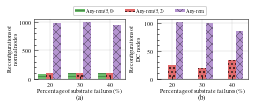

In [7]:
import numpy as np
N = 3
ind = np.arange(N) 
width = 1 / 4

x = [0, '20', '30', '40']
x_tick_label_list = ['20', '30', '40']
#colors = ['green', 'red', 'purple']
colors = ['C2', 'C3', 'C4']

fig, (ax1, ax2) = plt.subplots(1, 2)
#ax1.bar(x, objective)
#ax1.bar(x, objective[0])
#label_list = ['Lim-rec(5, 0)', 'Lim-rec(5, 2)', 'Any-rec']
label_list = ['Any-rem(5, 0)', 'Any-rem(5, 2)', 'Any-rem']

patterns = ('////////','\\\\\\\\','----',  'ooo', 'xxx', '\\', '\\\\','++', '*', 'O', '.')

plt.rcParams['hatch.linewidth'] = 0.25  # previous pdf hatch linewidth
#plt.rcParams['hatch.linewidth'] = 1.0  # previous svg hatch linewidth
#plt.rcParams['hatch.color'] = 'r'

for i in range(3):
    ax1.bar(ind + width * (i-1), nc_node_data[i], width, label=label_list[i],
            #alpha=0.7)
            color=colors[i],
           hatch=patterns[i+2], alpha=0.7)
           #yerr=error[i], ecolor='black', capsize=1)
ax1.grid(lw = 0.25)
ax2.grid(lw = 0.25)

ax1.set_xticklabels(x)
ax1.set_ylabel('Reconfigurations of \n normal nodes')
ax1.set_xlabel('Percentage of substrate failures (\%)')
#ax1.set_ylabel('Objective value')
#ax1.set_xlabel('Recovery Scenarios')
ax1.xaxis.set_label_coords(0.5,-0.17)
ax1.yaxis.set_label_coords(-0.17,0.5)

#ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=3, fancybox=True, shadow=True, fontsize='small')

for i in range(3):
    ax2.bar(ind + width * (i-1), nc_dc_data[i], width, label=label_list[i],
            color=colors[i],
            #alpha=0.7)
           hatch=patterns[i+2], alpha=0.7)

ax2.set_xticklabels(x)
ax2.set_ylabel('Reconfigurations of \n DC nodes')
ax2.set_xlabel('Percentage of substrate failures (\%)')
ax2.xaxis.set_label_coords(0.5,-0.17)
ax2.yaxis.set_label_coords(-0.17,0.5)

ax1.legend(loc='upper center', bbox_to_anchor=(1.16, 1.26),
          ncol=5, prop={'size': 5}, handletextpad=0.2)

fig.set_size_inches(fig_width, fig_height)
mpl.pyplot.subplots_adjust(wspace = 0.35)

#fig.subplots_adjust(left=.125, bottom=.235, right=.975, top=.88)
#fig.subplots_adjust(left=.125, bottom=.235, right=.97, top=.85)
#ax1.grid(color='b', ls = '-.', lw = 0.25)

ax1.set_title('(a)', y=-0.45, fontsize=7)
ax2.set_title('(b)', y=-0.45, fontsize=7)

fig.subplots_adjust(left=.12, bottom=.235, right=.97, top=.85)

plt.show()
fig.savefig('test-heuristic-num-reconfig.pdf')